In [1]:
%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import simtk.openmm as mm
from msmbuilder.decomposition import tICA, PCA

In [3]:
colvar = np.loadtxt('../ala4_explicit/COLVAR_md_explicit_10ns')
colvar_next = np.loadtxt('../finalrun/ala4-metad-ANC-2Dz-circular-recentered-10ns-round1/1/COLVAR')

In [4]:
z=np.loadtxt('../finalrun/anc_2DlatentZ_circular_round0')
z_next=colvar_next[:, 8:10]

In [5]:
z_conf1=[]
colvar_conf1=[]
basin=[0.0,0.4]
for i in range(len(z)):
    if(colvar[i,7]>basin[0] and colvar[i,7]<=basin[1]):
        z_conf1.append(z[i,:])
        colvar_conf1.append(colvar[i,:])
        
z_conf1=np.array(z_conf1)
colvar_conf1=np.array(colvar_conf1)
    

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn import datasets 
from sklearn.mixture import GMM

from sklearn.svm import SVC
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

In [7]:
train = pd.DataFrame(colvar_conf1[:,7]) 
test = pd.DataFrame(colvar_next[:,7])

In [8]:
#estimator_svm = OneClassSVM( gamma='auto')
#with SVM % wrong classification was 52%
estimator_svm = EllipticEnvelope()


In [9]:
estimator_svm.fit(train)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [10]:
labels_test_svm_outliers = estimator_svm.predict(test)
labels_train_svm_outliers = estimator_svm.predict(train)

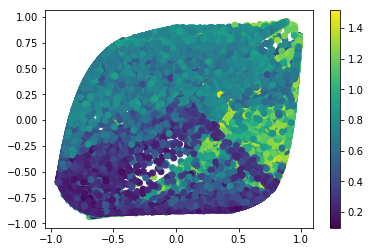

In [11]:
scatter(z_next[:,0], z_next[:,1],c=colvar_next[:,7])
colorbar()

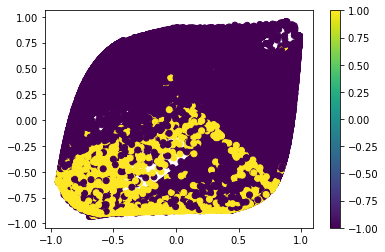

In [12]:
scatter(z_next[:,0], z_next[:,1],c=labels_test_svm_outliers)
colorbar()

In [13]:
x1=[]
y1=[]
z1=[]
s1=[]
x=[]
y=[]
z=[]
s=[]
countInOutlier=0
countInconf=0
for i in range(0,len(labels_test_svm_outliers)):
    if(labels_test_svm_outliers[i]==1):
        z1.append(labels_test_svm_outliers[i])
        x1.append(z_next[i,0])
        y1.append(z_next[i,1])
        s1.append(colvar_next[i,7])
        if(colvar_next[i,7]>basin[0] and colvar_next[i,7]<basin[1]):
            countInconf +=1
    elif(labels_test_svm_outliers[i]==-1):
        z.append(labels_test_svm_outliers[i])
        x.append(z_next[i,0])
        y.append(z_next[i,1])
        s.append(colvar_next[i,7])
        if(colvar_next[i,7]>basin[0] and colvar_next[i,7]<basin[1]):
            countInOutlier +=1

            
print("Total count of Conf1 in new traj : ", countInOutlier+countInconf )
print("Total count of correct classification : ", len(s1) )
print("Count of Conf1 correctly classified : ", countInconf )
print("Total count of outliers : ", len(s) )
print("Count of Conf1 in outliers ", countInOutlier )

p=float((float(countInOutlier)/float(countInOutlier+countInconf)))*100
print("% wrong classification : ", p)

Total count of Conf1 in new traj :  8532
Total count of correct classification :  7656
Count of Conf1 correctly classified :  7656
Total count of outliers :  42345
Count of Conf1 in outliers  876
% wrong classification :  10.2672292546


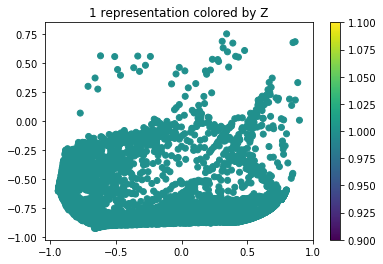

In [14]:
title("1 representation colored by Z")
scatter(x1,y1,c=z1)
colorbar()

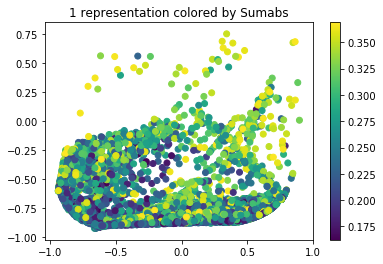

In [15]:
title("1 representation colored by Sumabs")
scatter(x1,y1,c=s1)
colorbar()

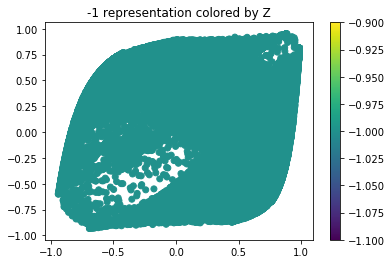

In [16]:
title("-1 representation colored by Z")
scatter(x,y,c=z)
colorbar()

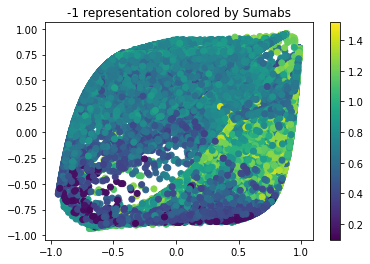

In [17]:
title("-1 representation colored by Sumabs")
scatter(x,y,c=s)
colorbar()